In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

c:\Users\riven\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\riven\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\riven\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
df = pd.read_csv("Predict_ready_df")

# Transform cyclic features

In [1]:
# from sklearn.preprocessing import FunctionTransformer

# def sin_transformer(period):
#     return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


# def cos_transformer(period):
#     return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

# hour_arr = np.array(df['hour'])
# month_arr = np.array(df['month'])


# df['hour_sin'] = sin_transformer(24).fit_transform(hour_arr.reshape(-1,1))
# df['hour_cos'] = cos_transformer(24).fit_transform(hour_arr.reshape(-1,1))
# df['month_sin'] = sin_transformer(12).fit_transform(month_arr.reshape(-1,1))
# df['month_cos'] = cos_transformer(12).fit_transform(month_arr.reshape(-1,1))


# Remove outlier

In [4]:
df.columns

Index(['Unnamed: 0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Unnamed: 0.1',
       'timestamp', 'station_id', 'bike_id', 'idle_time', 'bike_count',
       'temperature', 'windspeed', 'rain', 'hour', 'IsWeekday', 'month',
       'near_bus_station', 'near_school', 'near_leisure_spots', 'IsHoliday',
       'season'],
      dtype='object')

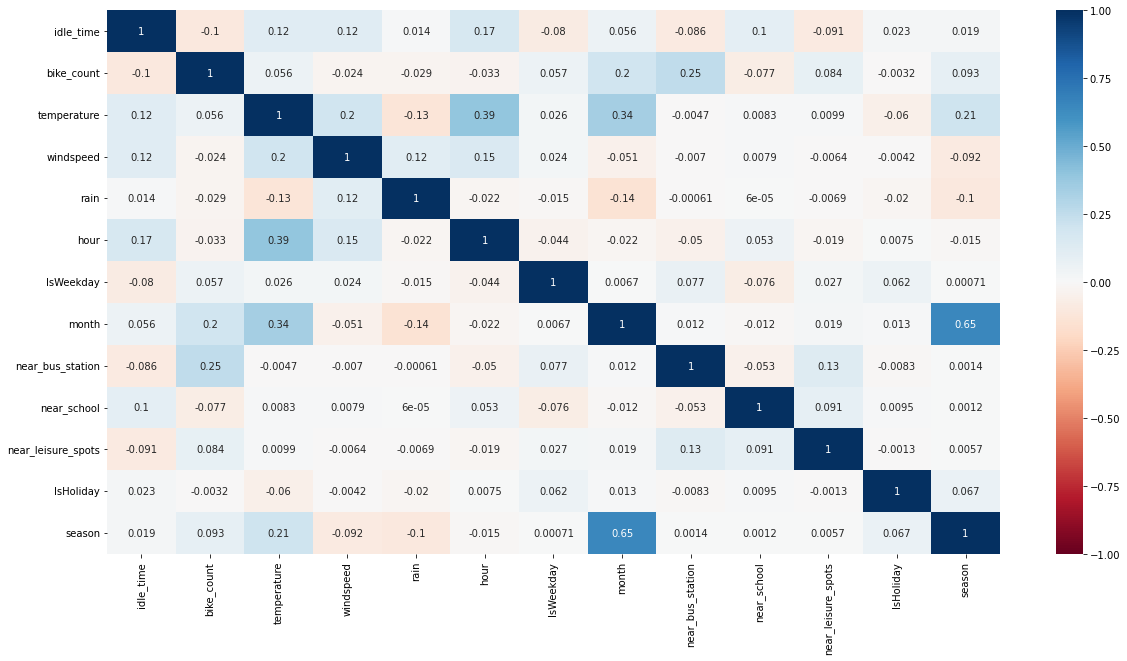

In [41]:
features =['idle_time',
       'bike_count', 'temperature', 'windspeed', 'rain', 'hour', 'IsWeekday',
       'month','near_bus_station', 'near_school',
       'near_leisure_spots', 'IsHoliday',
       ]

used = df[features]
plt.figure(figsize=(20, 10))
corr = used.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [5]:
xp = df[['bike_count',
       'temperature', 'windspeed','month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
         'rain', 'hour', 'IsWeekday',
       'near_bus_station', 'near_school', 'near_leisure_spots', 'IsHoliday',
       'season'
       ]].values

yp= df['idle_time'].values

In [6]:
sample_set = df[[ 'bike_count',
       'temperature', 'windspeed','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
        'rain','IsWeekday',
       'near_bus_station', 'near_school', 'near_leisure_spots',
       'IsHoliday', 'season','idle_time']].values

In [126]:
sample_size = 10000
random_indices = np.random.choice(sample_set.shape[0], size=sample_size, replace=False)
sample = sample_set[random_indices,:]

xs = sample[:,:34]
ys = sample[:,34:]

In [127]:
ys = np.log(ys)

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(xp, yp, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

Scaling features

In [8]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train[:,:3] = scaler.fit_transform(X_train[:,:3])
X_test[:,:3] = scaler.transform(X_test[:,:3])
X_val[:,:3] = scaler.transform(X_val[:,:3])

# xs[:,:3] = scaler.fit_transform(xs[:,:3])


(10000, 35)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
poly = PolynomialFeatures(degree= degree,include_bias= False)
poly_fts_train = poly.fit_transform(X_train[:,:3])
poly_fts_test = poly.transform(X_test[:,:3])
poly_fts_val = poly.transform(X_val[:,:3])

# poly_fts_xs = poly.fit_transform(xs[:,:3])




In [10]:
non_poly_train = X_train[:,3:]
non_poly_test = X_test[:,3:]
non_poly_val = X_val[:,3:]

# non_poly_xs = xs[:,3:]



In [11]:
poly_train = np.concatenate((poly_fts_train,non_poly_train),axis =1)
poly_test = np.concatenate((poly_fts_test,non_poly_test),axis =1)
poly_val = np.concatenate((poly_fts_val,non_poly_val),axis =1)

# poly_xs = np.concatenate((poly_fts_xs,non_poly_xs),axis =1)

In [12]:
poly_train.shape

(1555735, 63)

In [54]:

# define base model

 # create model
model = Sequential()
model.add(Dense(10, input_shape=(126,), kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))




model.add(Dense(1, kernel_initializer='normal'))
 # Compile model
model.compile(loss='mean_squared_error', optimizer='adam'
             )


In [55]:
model.fit(poly_xs,ys, batch_size =32, epochs = 50)

Epoch 1/50
313/313 [==============================] - 2s 2ms/step - loss: 19073.0625
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 15718.6240
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 14755.4590
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 14187.1631
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 13924.9150
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 13759.3779
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 13684.6094
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 13634.7666
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 13577.8398
Epoch 10/50
313/313 [==============================] - 1s 2ms/step - loss: 13534.0752
Epoch 11/50
313/313 [==============================] - 1s 2ms/step - loss: 13508.1836
Epoch 12/50
313/313 [==============================] - 1s 2ms/s

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='neg_mean_squared_error')
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


In [13]:
# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_train, y_train)
print(regression_model.coef_ ,regression_model.intercept_)
regression_model.coef_
regression_model.intercept_


[-4.22273723e+02 -1.17975296e+02  4.66527295e+01  9.37354754e+02
 -6.03613193e+01  4.22578234e+02  2.07811545e+02 -1.69208788e+02
  2.91020230e+01 -1.04581251e+03  1.25952268e+03  3.20670627e+02
 -6.62848982e+02 -1.28061482e+03 -3.12022163e+02 -1.12937392e+02
  6.26148813e+01  2.00412843e+02 -1.06130732e+02  3.50194710e+12
  3.50194710e+12  3.50194710e+12  3.50194710e+12  3.50194710e+12
  3.50194710e+12  3.50194710e+12  3.50194710e+12  7.78770810e+12
  7.78770810e+12  7.78770810e+12  3.50194710e+12 -3.63621910e+11
 -6.75813416e+11 -9.88004922e+11 -1.30019643e+12 -1.61238793e+12
 -1.92457944e+12 -2.23677094e+12 -2.54896245e+12 -2.86115396e+12
 -3.17334546e+12 -3.48553697e+12 -3.79772847e+12 -4.10991998e+12
 -4.42211148e+12 -4.73430299e+12 -5.04649450e+12 -5.35868600e+12
 -5.67087751e+12 -5.98306901e+12 -6.29526052e+12 -6.60745202e+12
 -6.91964353e+12 -7.23183503e+12 -7.54402654e+12  1.86638184e+01
  3.12191506e+11 -2.30917969e+01 -1.90830078e+01  5.19765625e+01
 -4.37905273e+01  2.81755

-3138325184722.138

In [93]:
from sklearn.linear_model import Ridge

# initialize model
model_L2 = Ridge(alpha = 0.1, solver = 'lsqr') # select least squares regression as solver

# train model
model_L2.fit(poly_xs, ys)


print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [[-1.93829794e-19  1.97320592e-19  2.49401439e-19 -5.63802928e-19
  -9.28024628e-20 -5.19447619e-20  2.44383268e-19  2.10782341e-19
   2.27393688e-19 -2.63448966e-18 -9.35963740e-20  1.05198847e-19
  -2.44509590e-19 -7.69165701e-20 -2.36985982e-19  1.01043991e-18
   5.97067490e-19  4.95196011e-19  7.71614312e-19 -1.33295501e-17
  -6.08286020e-19  2.94135251e-19 -4.93314545e-19 -5.86342362e-20
  -4.48275601e-19 -4.80002170e-19 -1.48425574e-19 -1.71540088e-19
  -3.03875507e-19  2.32735935e-18  1.16024302e-18  7.52218142e-19
   8.58727013e-19  1.60314551e-18 -7.17582181e-17 -3.65597539e-18
   1.10540833e-18 -2.52952922e-18 -4.95350130e-19 -2.21699228e-18
  -4.72491774e-19  1.03901491e-19 -4.65047551e-20 -5.47692215e-21
  -1.24866050e-18 -3.19680176e-19 -3.66416449e-19 -2.96163360e-19
  -1.00667115e-18  8.21897026e-18  3.57071904e-18  2.13230261e-18
   1.63933722e-18  2.23030868e-18  5.53676237e-18 -4.00184948e-16
  -2.35617059e-17  3.49462564e-18 -1.34378603e-17 -2.93631370e

In [ ]:
from sklearn.linear_model import Lasso

model_L1 = Lasso(alpha = 0.00001)

model_L1.fit(poly_train, y_train)

print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

In [85]:
poly_val.shape

(4156794, 3)

In [17]:
def plot_L2_regression_performance ():

    err_train = []
    err_cv = []
    
    

    for alpha in np.logspace(-20,-10,20):

        
        
        

        # fit model
        model_L2 = Ridge(alpha = alpha, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(poly_x, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(poly_x), y_train))
        err_cv.append(mean_squared_error(model_L2.predict(poly_val), y_val))


    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-20,-10,20), err_train, np.logspace(-20,-10,20), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

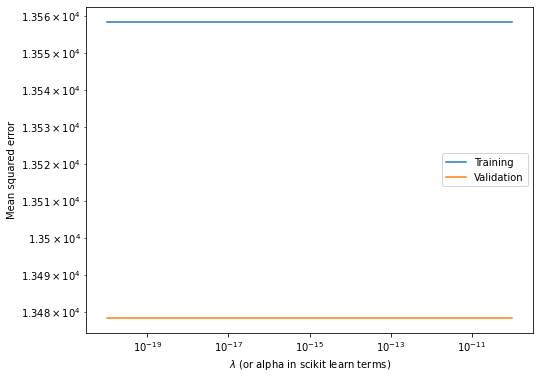

In [18]:
plot_L2_regression_performance()

In [14]:

train_pred = regression_model.predict(poly_test)
print("Test set performance:")

print("MAE:",mean_absolute_error(y_test, train_pred))
print("RMSE:",(mean_squared_error(y_test, train_pred))**(0.5))  
print("R2:",r2_score(y_test, train_pred))

Test set performance:
MAE: 86.65659594604902
RMSE: 159.71597934883968
R2: 0.16643340648791038


In [15]:
train_pred.min()

-113.71923828125

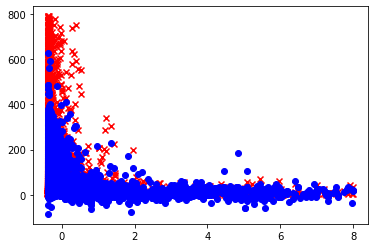

In [119]:
plt.scatter(xs[:,0:1],ys,marker ="x",color = "red")
plt.scatter(xs[:,0:1],train_pred,marker ="o",color ="blue")